## Chapter 1. Vectors and vector spaces

In [1]:
from sklearn.datasets import load_iris

data = load_iris()

X, y = data["data"], data["target"]

In [2]:
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [3]:
X.shape

(150, 4)

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

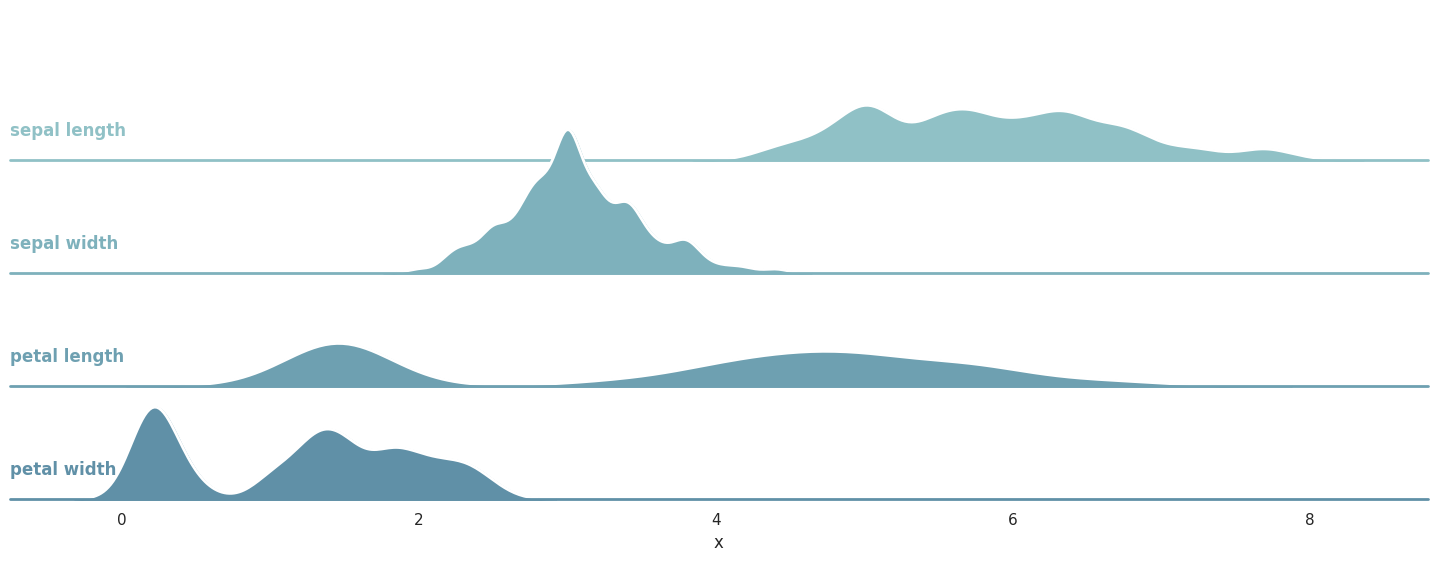

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
x = X.ravel()
labels = ["sepal length", "sepal width", "petal length", "petal width"]
g = np.tile(labels, len(X))
df = pd.DataFrame(dict(x=x, g=g))

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=10, height=1.5, palette=pal)

# Draw the densities
g.map(sns.kdeplot, "x", bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# Add reference line
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Label each plot
g.map(lambda x, color, label: plt.gca().text(0, .2, label, fontweight="bold", color=color,
                                             ha="left", va="center", transform=plt.gca().transAxes), "x")

# Adjust subplots and aesthetics
g.figure.subplots_adjust(hspace=-.25)
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

plt.show()

In [6]:
X_scaled = (X - X.mean(axis=0))/X.std(axis=0)

In [7]:
X_scaled[:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

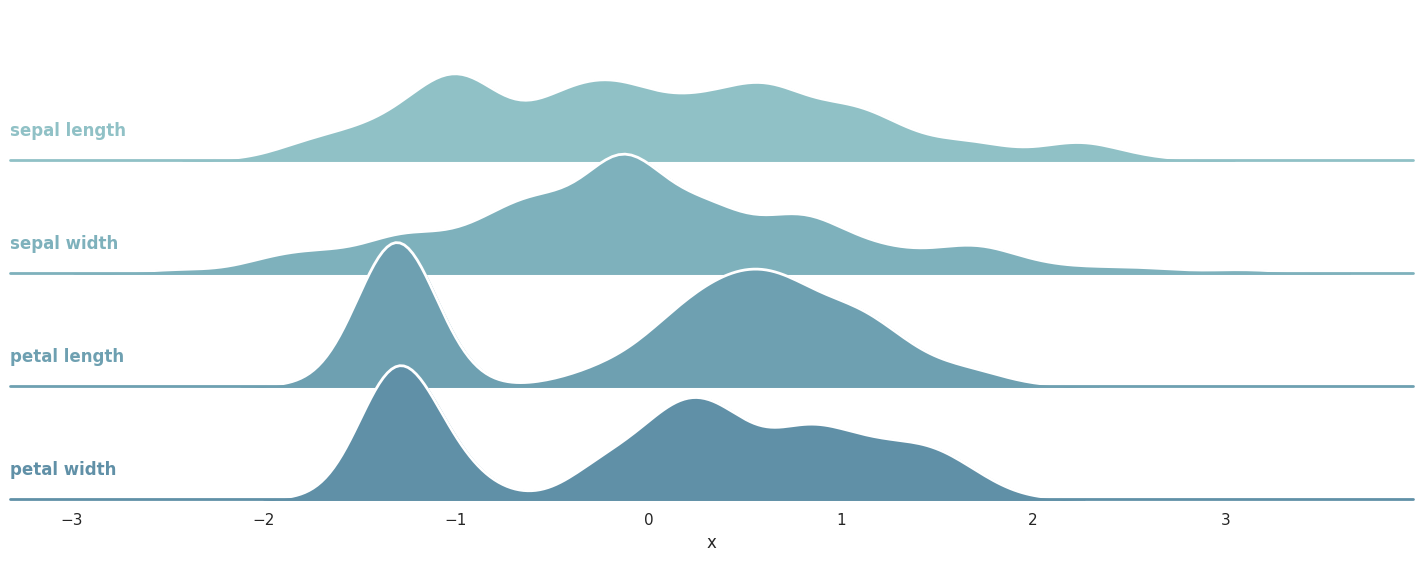

In [8]:
# Create the data
x = X_scaled.ravel()
labels = ["sepal length", "sepal width", "petal length", "petal width"]
g = np.tile(labels, X_scaled.shape[0])
df = pd.DataFrame(dict(x=x, g=g))

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
grid = sns.FacetGrid(df, row="g", hue="g", aspect=10, height=1.5, palette=pal)

# Draw the densities
grid.map(sns.kdeplot, "x", bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
grid.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw_adjust=.5)

# Add reference line
grid.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

# Add labels to each plot
grid.map(lambda x, color, label: plt.gca().text(0, .2, label, fontweight="bold", color=color,
                                                ha="left", va="center", transform=plt.gca().transAxes), "x")

# Adjust subplots and aesthetics
grid.figure.subplots_adjust(hspace=-.25)
grid.set_titles("")
grid.set(yticks=[], ylabel="")
grid.despine(bottom=True, left=True)

plt.show()


## Vectors in practice

### Tuples

In [9]:
v_tuple = (1, 3.5, -2.71, "a string", 42)

In [10]:
v_tuple

(1, 3.5, -2.71, 'a string', 42)

In [11]:
type(v_tuple)

tuple

In [14]:
v_tuple[1]

3.5

In [13]:
len(v_tuple)

5

In [15]:
v_tuple[1:4]

(3.5, -2.71, 'a string')

In [16]:
v_tuple[0] = 2

TypeError: 'tuple' object does not support item assignment

### Lists

In [17]:
v_list = [1, 3.5, -2.71, "qwerty"]

In [18]:
type(v_list)

list

In [19]:
v_list[0] = "this is a string"

In [20]:
v_list

['this is a string', 3.5, -2.71, 'qwerty']

In [21]:
v_list_addr = id(v_list)

In [22]:
v_list_addr

137334126664896

In [23]:
v_list.append([42])    # adding the list [42] to the end of our list
v_list

['this is a string', 3.5, -2.71, 'qwerty', [42]]

In [24]:
id(v_list) == v_list_addr    # adding elements doesn't create any new objects

True

In [25]:
v_list.pop(1)    # removing the element at the index "1"
v_list

['this is a string', -2.71, 'qwerty', [42]]

In [26]:
id(v_list) == v_list_addr    # removing elements still doesn't create any new objects

True

In [27]:
[1, 2, 3] + [4, 5, 6]

[1, 2, 3, 4, 5, 6]

In [28]:
3*[1, 2, 3]

[1, 2, 3, 1, 2, 3, 1, 2, 3]

### NumPy arrays

In [29]:
l = [2**142 + 1, "a string"]

In [30]:
l.append(lambda x: x)

In [31]:
l

[5575186299632655785383929568162090376495105,
 'a string',
 <function __main__.<lambda>(x)>]

In [32]:
[id(x) for x in l]

[137334044566960, 137334044992624, 137334044620768]

In [33]:
import numpy as np

In [34]:
X = np.array([87.7, 4.5, -4.1, 42.1414, -3.14, 2.001])    # creating a NumPy array from a Python list

In [35]:
X

array([87.7   ,  4.5   , -4.1   , 42.1414, -3.14  ,  2.001 ])

In [36]:
np.ones(shape=7)    # initializing a NumPy array from scratch using ones

array([1., 1., 1., 1., 1., 1., 1.])

In [37]:
np.zeros(shape=5)    # initializing a NumPy array from scratch using zeros

array([0., 0., 0., 0., 0.])

In [38]:
np.random.rand(10)

array([0.39423732, 0.32574722, 0.96156303, 0.12040986, 0.39307669,
       0.95575825, 0.44182064, 0.35630879, 0.42105267, 0.09675309])

In [39]:
np.zeros_like(X)

array([0., 0., 0., 0., 0., 0.])

In [40]:
X[0] = 1545.215
X

array([1545.215 ,    4.5   ,   -4.1   ,   42.1414,   -3.14  ,    2.001 ])

In [41]:
X[1:4]

array([ 4.5   , -4.1   , 42.1414])

In [42]:
X[0] = "str"

ValueError: could not convert string to float: 'str'

In [43]:
X.dtype

dtype('float64')

In [44]:
val = 23
type(val)

int

In [45]:
X[0] = val
X

array([23.    ,  4.5   , -4.1   , 42.1414, -3.14  ,  2.001 ])

In [46]:
for x in X:
    print(x)

23.0
4.5
-4.1
42.1414
-3.14
2.001


### NumPy arrays as vectors

In [47]:
v_1 = np.array([-4.0, 1.0, 2.3])
v_2 = np.array([-8.3, -9.6, -7.7])

In [48]:
v_1 + v_2    # adding v_1 and v_2 together as vectors

array([-12.3,  -8.6,  -5.4])

In [49]:
10.0*v_1    # multiplying v_1 with a scalar

array([-40.,  10.,  23.])

In [50]:
v_1 * v_2    # the elementwise product of v_1 and v_2

array([ 33.2 ,  -9.6 , -17.71])

In [51]:
np.zeros(shape=3) + 1

array([1., 1., 1.])

In [52]:
def f(x):
    return 3*x**2 - x**4

In [53]:
f(v_1)

array([-208.    ,    2.    ,  -12.1141])

In [54]:
from timeit import timeit


n_runs = 100000
size = 1000


t_add_builtin = timeit(
    "[x + y for x, y in zip(v_1, v_2)]",
    setup=f"size={size}; v_1 = [0 for _ in range(size)]; v_2 = [0 for _ in range(size)]",
    number=n_runs
)

t_add_numpy = timeit(
    "v_1 + v_2",
    setup=f"import numpy as np; size={size}; v_1 = np.zeros(shape=size); v_2 = np.zeros(shape=size)",
    number=n_runs
)


print(f"Built-in addition:       \t{t_add_builtin} s")
print(f"NumPy addition:          \t{t_add_numpy} s")
print(f"Performance improvement: \t{t_add_builtin/t_add_numpy:.3f} times faster")

Built-in addition:       	4.138857461000043 s
NumPy addition:          	0.15250930600018364 s
Performance improvement: 	27.138 times faster


### Is NumPy really faster than Python?

In [55]:
from numpy.random import random as random_np
from random import random as random_py


n_runs = 10000000
t_builtin = timeit(random_py, number=n_runs)
t_numpy = timeit(random_np, number=n_runs)

print(f"Built-in random:\t{t_builtin} s")
print(f"NumPy random:   \t{t_numpy} s")

Built-in random:	0.84761268200009 s
NumPy random:   	5.2550250339998 s


In [56]:
size = 1000
n_runs = 10000

t_builtin_list = timeit(
    "[random_py() for _ in range(size)]",
    setup=f"from random import random as random_py; size={size}",
    number=n_runs
)

t_numpy_array = timeit(
    "random_np(size)",
    setup=f"from numpy.random import random as random_np; size={size}",
    number=n_runs
)

print(f"Built-in random with lists:\t{t_builtin_list}s")
print(f"NumPy random with arrays:  \t{t_numpy_array}s")

Built-in random with lists:	0.6956790970000384s
NumPy random with arrays:  	0.09666816300000391s


In [57]:
from IPython.core import page
page.page = print

In [58]:
def builtin_random_single(n_runs):
    for _ in range(n_runs):
        random_py()

In [59]:
n_runs = 10000000

%prun builtin_random_single(n_runs)

         10000581 function calls (10000569 primitive calls) in 2.449 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    1.161    0.581    2.010    1.005 {built-in method time.sleep}
 10000000    1.028    0.000    1.028    0.000 {method 'random' of '_random.Random' objects}
      2/1    0.135    0.068    2.390    2.390 <string>:1(<module>)
        1    0.087    0.087    0.151    0.151 ipython-input-2471337341.py:1(builtin_random_single)
       14    0.021    0.002    0.036    0.003 socket.py:632(send)
        2    0.011    0.005    0.043    0.021 iostream.py:219(<lambda>)
        2    0.003    0.002    0.005    0.003 {method 'recv' of '_socket.socket' objects}
        1    0.000    0.000    0.011    0.011 selector_events.py:129(_read_from_self)
      5/3    0.000    0.000    0.043    0.014 {method 'run' of '_contextvars.Context' objects}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Pr

In [60]:
def numpy_random_single(n_runs):
    for _ in range(n_runs):
        random_np()

In [61]:
%prun numpy_random_single(n_runs)

         81 function calls (79 primitive calls) in 7.803 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        7    7.039    1.006    7.039    1.006 {built-in method time.sleep}
        1    0.729    0.729    7.803    7.803 <string>:1(<module>)
        1    0.035    0.035    0.035    0.035 ipython-input-2015715881.py:1(numpy_random_single)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
        8    0.000    0.000    0.000    0.000 {built-in method posix.getppid}
        1    0.000    0.000    7.803    7.803 {built-in method builtins.exec}
        1    0.000    0.000    7.803    7.803 base_events.py:1922(_run_once)
        1    0.000    0.000    0.000    0.000 attrsettr.py:43(__getattr__)
        1    0.000    0.000    0.000    0.000 attrsettr.py:66(_get_attr_opt)
        2    0.000    0.000    0.000    0.000 enum.py:1561(__and__)
    19/17    0.000    0.000    0.000    0.000

In [62]:
def builtin_random_list(size, n_runs):
    for _ in range(n_runs):
        [random_py() for _ in range(size)]

In [63]:
size = 1000
n_runs = 10000

%prun builtin_random_list(size, n_runs)

         10000581 function calls (10000567 primitive calls) in 2.607 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    1.157    0.578    2.010    1.005 {built-in method time.sleep}
 10000000    1.101    0.000    1.101    0.000 {method 'random' of '_random.Random' objects}
      2/1    0.259    0.129    2.528    2.528 <string>:1(<module>)
        1    0.040    0.040    0.070    0.070 ipython-input-2575888617.py:1(builtin_random_list)
       14    0.030    0.002    0.051    0.004 socket.py:632(send)
        2    0.016    0.008    0.063    0.031 iostream.py:219(<lambda>)
        2    0.003    0.002    0.005    0.003 {method 'recv' of '_socket.socket' objects}
       16    0.000    0.000    0.000    0.000 enum.py:1550(__or__)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
      2/1    0.000    0.000    2.529    2.529 {built-in method builtins.exec}
       72    0.000   

In [64]:
def numpy_random_array(size, n_runs):
    for _ in range(n_runs):
        random_np(size)

In [65]:
%prun numpy_random_array(size, n_runs)

         575 function calls (563 primitive calls) in 0.101 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.098    0.098    0.098    0.098 ipython-input-1681905588.py:1(numpy_random_array)
      5/4    0.001    0.000    0.002    0.000 events.py:86(_run)
      2/0    0.001    0.000    0.000          {method 'poll' of 'select.epoll' objects}
       14    0.000    0.000    0.000    0.000 socket.py:632(send)
      2/1    0.000    0.000    0.098    0.098 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}
       72    0.000    0.000    0.000    0.000 enum.py:1543(_get_value)
        2    0.000    0.000    0.000    0.000 socket.py:780(recv_multipart)
        2    0.000    0.000    0.000    0.000 {method 'recv' of '_socket.socket' objects}
        5    0.000    0.000    0.000    0.000 attrsettr.py:66(_get_attr_opt)
      2/1    0.000    0.000    0.098   

In [66]:
sizes = list(range(1, 100))

runtime_builtin = [
    timeit(
        "[random_py() for _ in range(size)]",
        setup=f"from random import random as random_py; size={size}",
        number=100000
    )
    for size in sizes
]


runtime_numpy = [
    timeit(
        "random_np(size)",
        setup=f"from numpy.random import random as random_np; size={size}",
        number=100000
    )
    for size in sizes
]

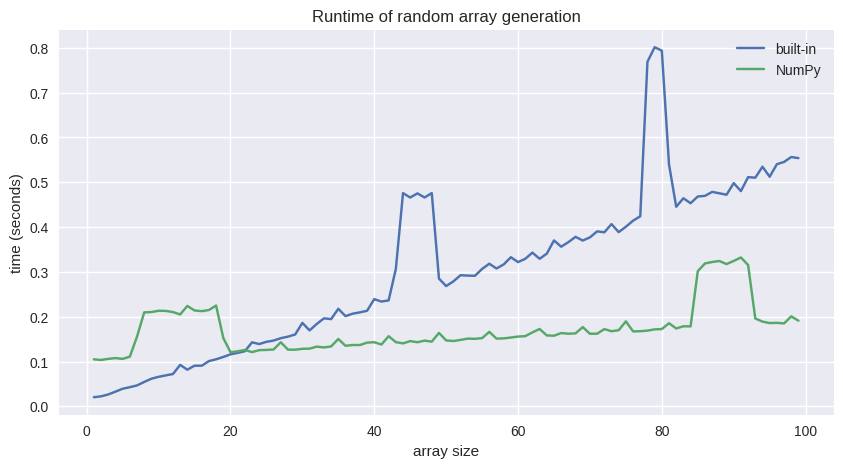

In [67]:
import matplotlib.pyplot as plt


with plt.style.context("seaborn-v0_8"):
    plt.figure(figsize=(10, 5))
    plt.plot(sizes, runtime_builtin, label="built-in")
    plt.plot(sizes, runtime_numpy, label="NumPy")
    plt.xlabel("array size")
    plt.ylabel("time (seconds)")
    plt.title("Runtime of random array generation")
    plt.legend()
    plt.show()